# Porównanie estymatorów parametru kształtu dla rozkładu Gamma

In [28]:
import math
import collections
import statistics as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.special as sp
import scipy.optimize as opt
# Pakiet do tabel
# !pip install tabulate
import tabulate
n = 100
ALFA = 0.

# Wyznaczenie statystyki R(x) = śr_art(x)/śr_geom(x)

In [29]:
x = stats.gamma.rvs(a=ALFA, size=n)
Rx = st.mean(x)/st.geometric_mean(x)
lRx = math.log(Rx)
lRx

0.5093950325944814

# Wykres funkcji g(\alpha) = ln(\alpha) - Psi(\alpha)

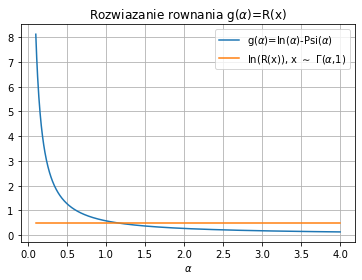

In [30]:
# KONIECZNA WARTOŚĆ w
xx = np.linspace(0.1, 4, 1000)
yy = []
for i in xx:
    yy.append(math.log(i) - sp.psi(i))
dd = []
for i in xx:
    dd.append(lRx)  
plt.plot(xx,yy, label=r'g($\alpha$)=ln($\alpha$)-Psi($\alpha$)')
plt.plot(xx,dd, label=r'ln(R(x)), x $\sim$ $\Gamma$($\alpha$,1)')
plt.title(r'Rozwiazanie rownania g($\alpha$)=R(x)')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.grid()
plt.savefig("C:\\Users\\123\\Documents\\DDR\\Praca\\gR.pgf", bbox_inches='tight')
plt.show()
plt.close()

# Wyznaczenie rozwiązania równania g(\alpha) = ln R(x) metodą bisekcji

In [14]:
def g(v):
    return math.log(v) - sp.psi(v) - lRx
# Metoda bisekcji
iter = 100
delta = 0.00001
# KONIECZNA WARTOŚĆ lRx
ka = 0.00001
kb = 2*ALFA
for k in range(1, iter):
    v = (ka + kb) / 2
    if abs(g(v)) < delta:
        break
    else:
        if g(v) * g(ka) < 0:
            kb = v
        else:
            ka = v

# Wyznaczenie Estymatorów parametru kształtu

In [15]:
# Wyznaczenie Estymatora Największej Wiarogodności
eNW = opt.fsolve(g,0.01)
def gn(v):
    return  sp.psi(n*v) - sp.psi(v) - math.log(n) - lRx
# Wyznaczenie Estymatora Niezmienniczego Największej Wiarogodności
eNNW = opt.fsolve(gn,0.01)
lnX = []
for i in range(n):
    lnX.append(math.log(x[i]))
XlnX = []
for i in range(n):
    XlnX.append(x[i]*math.log(x[i]))
S = np.sum(x)
SlnX = np.sum(lnX)
SXlnX = np.sum(XlnX)
# Wyznaczenie Nowego Estymatora
NewE = (n*S)/(n*SXlnX - SlnX*S)

In [16]:
print("Pierwiastekiem równiania z fsolve() jest x0 =",eNW,"g(eNW)=",g(eNW))
print("Pierwiastekiem równiania z Bisekcji jest v =",v,"g(v)=",g(v))
print("--------------------------------------------------------------------")
print("Estymator Największej Wiarogodności eNW =",eNW,", g(eNW)=",g(eNW))
print("Estymator Niezmienniczy Największej Wiarogodności eNNW =",eNNW,", g(eNNW)=",gn(eNNW))
print("Nowy Estymator NewE =",NewE)

Pierwiastekiem równiania z fsolve() jest x0 = [0.58321187] g(eNW)= [8.8817842e-16]
Pierwiastekiem równiania z Bisekcji jest v = 0.5832143684387207 g(v)= -5.244439669649381e-06
--------------------------------------------------------------------
Estymator Największej Wiarogodności eNW = [0.58321187] , g(eNW)= [8.8817842e-16]
Estymator Niezmienniczy Największej Wiarogodności eNNW = [0.57911208] , g(eNNW)= [4.4408921e-16]
Nowy Estymator NewE = 0.5753428892325528


In [20]:
l = [["cos1",3],["cos2",7],["cos3",6]]
table = tabulate(l, headers=["n","R"])
print(table)

TypeError: 'module' object is not callable

In [25]:
#!pip install plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['n', 'R^{*}']),
                 cells=dict(values=[[n, n+10, n+50], [eNW, eNNW , NewE]]))
                     ])
fig.show()